In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

dv = pd.read_csv('Bangalore  house data.csv')

def preprocess_total_sqft(total_sqft):
    try:
        return float(total_sqft)
    except ValueError:
        # Handle non-numeric values (e.g., ranges)
        parts = total_sqft.split('-')
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2
        else:
            return None

dv['total_sqft'] = dv['total_sqft'].apply(preprocess_total_sqft)
dv['total_sqft'] = pd.to_numeric(dv['total_sqft'])
dv['price'] = pd.to_numeric(dv['price'])
dv = dv.dropna(subset=['price','total_sqft'])

validation_size = 0.20
seed = 6
X_train,X_test,y_train,y_test = model_selection.train_test_split(dv['total_sqft'], dv['price'], test_size = validation_size , random_state = seed)

scaler = StandardScaler()
X_train = X1_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

model=LinearRegression()

model.fit(X_train,y_train)

model.predict(X_test)


array([82.63062847, 98.97255202, 91.93091017, ..., 87.61292224,
       89.27368683, 85.95215765])

In [6]:
dv.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [7]:
mse = mean_squared_error(y_test,model.predict(X_test))
print("Mean Squared Error Value: ",mse)
mae = mean_absolute_error(y_test,model.predict(X_test))
print("Mean Absolute Error Value: ",mae)
r2 = r2_score(y_test,model.predict(X_test))
print("R2 Scored Value: ",r2)

Mean Squared Error Value:  16628.00772401301
Mean Absolute Error Value:  51.32325520980614
R2 Scored Value:  0.2243771945761257


In [8]:
price_variance = dv['price'].var()
print("Variance of prices:", price_variance)

Variance of prices: 22221.9744927432


In [9]:
model.score(X_train,y_train)

0.3601974049092851

In [10]:
model.score(X_test,y_test)

0.2243771945761257

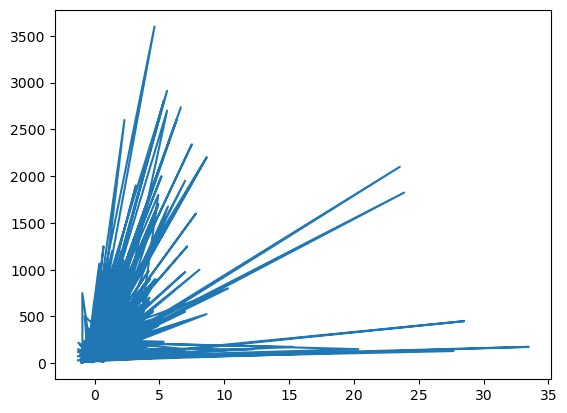

In [11]:
plt.plot(X_train,y_train)

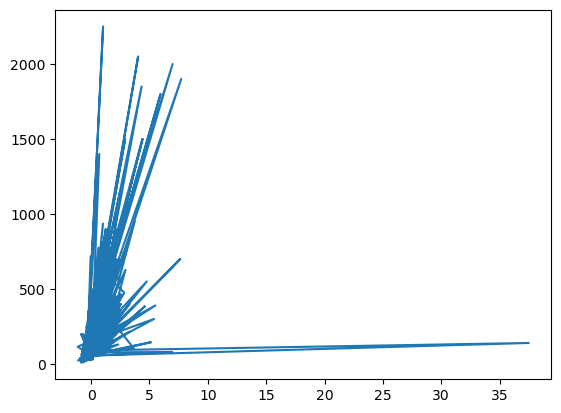

In [12]:
plt.plot(X_test,y_test)

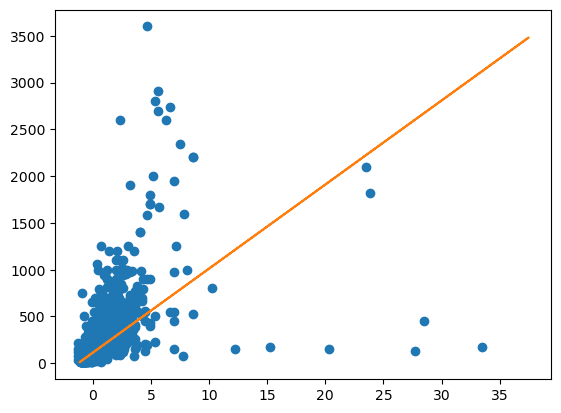

In [13]:
plt.plot(X_train,y_train,'o')
plt.plot(X_test,model.predict(X_test))

In [14]:
dv.keys()

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [15]:
dv.area_type

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13274, dtype: object